# Data analysis in Python

[Pandas](https://pydata.pandas.org/) is the de facto library for data analysis in Python.

This notebook will not teach you Pandas. You can learn about Pandas from:

- [10 minutes to Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
- [Python Pandas Tutorials](https://youtube.com/playlist?list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS)

What we will do is actually analyze a dataset with Pandas.


## Analyze card data

We'll analyze this [card transactions dataset](https://drive.google.com/file/d/1XGvuFjoTwlybkw0cc9u34horMF9vMhrB/view?usp=drive_link).

It's a [parquet file](https://parquet.apache.org/). Parquet is a file format like Excel or CSV, but is fast, small, and great for analysis. I usually convert all my files to Parquet at the start.

Let's download it.

In [2]:
# Download the card transactions dataset as transactions.parquet
!curl -C- -o transactions.parquet "https://drive.usercontent.google.com/download?id=1XGvuFjoTwlybkw0cc9u34horMF9vMhrB&export=download"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3150k  100 3150k    0     0  1339k      0  0:00:02  0:00:02 --:--:-- 1339k


Pandas can [read Parquet files](https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html). Let's preview the file:

In [3]:
import pandas as pd

df = pd.read_parquet("transactions.parquet")
df

,Transaction ID,Transaction Date,Transaction Time,Transaction Type,Channel,Is 3DS,Is Token,Is Disputable?,Decision,Decline Reason Code,...,Issuer Region,Funding source,Acquirer Name,Acquirer Country,Acquirer Region,Jurisdiction,Is Disputed?,Is Fraud?,Dispute Type,Amount
0,44528143332515,2024-01-20,10:56:57,Recurring,CNP,No,No,1,Approved,Approved,...,LAC,Credit,BANCO DO BRASIL S.A.,BRAZIL,LAC,Domstic,0,0,No Dispute,473.021408
1,87219140686304,2024-01-20,05:45:41,Chip,CP,No,No,0,Approved,Approved,...,APAC,Debit,ABS BANK,NEW ZEALAND,APAC,Domstic,0,0,No Dispute,458.150373
2,6162084955340,2024-01-17,09:10:18,Chip,CP,No,No,0,Declined,Suspected Fraud,...,USA,Credit,REGIONS BANK,UNITED STATES OF AMERICA,USA,Domstic,0,0,No Dispute,311.439711
3,38007435736476,2024-01-18,22:12:41,ECI-7,CNP,No,No,1,Approved,Approved,...,USA,Credit,"COLLABRIA FINANCIAL SERVICES, INC.",CANADA,CANADA,Cross Boarder,0,0,No Dispute,290.205985
4,70043946387227,2024-01-20,02:39:07,Chip,CP,No,No,0,Approved,Approved,...,USA,Credit,FIRST NATIONAL BANK OF OMAHA,UNITED STATES OF AMERICA,USA,Domstic,0,0,No Dispute,193.298985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100927,16591947595112,2024-01-18,02:08:15,Chip,CP,No,No,0,Approved,Approved,...,CANADA,Debit,CANADIAN IMPERIAL BANK OF COMMERCE,CANADA,CANADA,Domstic,0,0,No Dispute,192.294630
100928,37528054132136,2024-01-18,09:14:48,Chip,CP,No,No,0,Approved,Approved,...,USA,Credit,"M&T BANK CITIZENS BANK, NATIONAL ASSOCIATION",UNITED STATES OF AMERICA,USA,Domstic,0,0,No Dispute,11.938520
100929,8877298731860,2024-01-17,06:43:02,Chip,CP,No,No,0,Declined,Not Sufficient Fund,...,USA,Debit,REGIONS BANK,UNITED STATES OF AMERICA,USA,Domstic,0,0,No Dispute,227.540243
100930,82417130017576,2024-01-20,11:32:00,ECI-7,CNP,No,No,1,Approved,Approved,...,LAC,Credit,BANCO COOPERATIVO SICREDI S.A.,BRAZIL,LAC,Domstic,0,0,No Dispute,244.949937


That's a lot of stuff! In the old days, I would read this carefully. Now, let me [copy-paste this into ChatGPT and ask it](https://chatgpt.com/share/d039661a-0083-4062-a4ee-94491a88ac53):

```text
I have the following dataframe. Explain it to me step by step.

	Transaction ID	Transaction Date	Transaction Time	Transaction Type	Channel	Is 3DS	Is Token	Is Disputable?	Decision	Decline Reason Code	...	Issuer Region	Funding source	Acquirer Name	Acquirer Country	Acquirer Region	Jurisdiction	Is Disputed?	Is Fraud?	Dispute Type	Amount
0	44528143332515	2024-01-20	10:56:57	Recurring	CNP	No	No	1	Approved	Approved	...	LAC	Credit	BANCO DO BRASIL S.A.	BRAZIL	LAC	Domstic	0	0	No Dispute	473.021408
1	87219140686304	2024-01-20	05:45:41	Chip	CP	No	No	0	Approved	Approved	...	APAC	Debit	ABS BANK	NEW ZEALAND	APAC	Domstic	0	0	No Dispute	458.150373
2	6162084955340	2024-01-17	09:10:18	Chip	CP	No	No	0	Declined	Suspected Fraud	...	USA	Credit	REGIONS BANK	UNITED STATES OF AMERICA	USA	Domstic	0	0	No Dispute	311.439711
3	38007435736476	2024-01-18	22:12:41	ECI-7	CNP	No	No	1	Approved	Approved	...	USA	Credit	COLLABRIA FINANCIAL SERVICES, INC.	CANADA	CANADA	Cross Boarder	0	0	No Dispute	290.205985
4	70043946387227	2024-01-20	02:39:07	Chip	CP	No	No	0	Approved	Approved	...	USA	Credit	FIRST NATIONAL BANK OF OMAHA	UNITED STATES OF AMERICA	USA	Domstic	0	0	No Dispute	193.298985
...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...	...
100927	16591947595112	2024-01-18	02:08:15	Chip	CP	No	No	0	Approved	Approved	...	CANADA	Debit	CANADIAN IMPERIAL BANK OF COMMERCE	CANADA	CANADA	Domstic	0	0	No Dispute	192.294630
100928	37528054132136	2024-01-18	09:14:48	Chip	CP	No	No	0	Approved	Approved	...	USA	Credit	M&T BANK CITIZENS BANK, NATIONAL ASSOCIATION	UNITED STATES OF AMERICA	USA	Domstic	0	0	No Dispute	11.938520
100929	8877298731860	2024-01-17	06:43:02	Chip	CP	No	No	0	Declined	Not Sufficient Fund	...	USA	Debit	REGIONS BANK	UNITED STATES OF AMERICA	USA	Domstic	0	0	No Dispute	227.540243
100930	82417130017576	2024-01-20	11:32:00	ECI-7	CNP	No	No	1	Approved	Approved	...	LAC	Credit	BANCO COOPERATIVO SICREDI S.A.	BRAZIL	LAC	Domstic	0	0	No Dispute	244.949937
100931	68130793825644	2024-01-17	08:26:00	Chip	CP	No	No	0	Approved	Approved	...	APAC	Debit	ING BANK (AUSTRALIA) LIMITED	AUSTRALIA	APAC	Domstic	0	0	No Dispute	253.094314
100932 rows × 22 columns
```



In the first iteration, it didn't get all the column names -- because the preview only showed some of the columns.

Let's look at all the columns:

In [4]:
df.columns

Index(['Transaction ID', 'Transaction Date', 'Transaction Time',
       'Transaction Type', 'Channel', 'Is 3DS', 'Is Token', 'Is Disputable?',
       'Decision', 'Decline Reason Code', 'Issuer Name', 'Issuer Country',
       'Issuer Region', 'Funding source', 'Acquirer Name', 'Acquirer Country',
       'Acquirer Region', 'Jurisdiction', 'Is Disputed?', 'Is Fraud?',
       'Dispute Type', 'Amount'],
      dtype='object')

[Now let's feed it back into ChatGPT](https://chatgpt.com/share/d039661a-0083-4062-a4ee-94491a88ac53):

```text
You missed some columns in the columns overview.  Here is the full list of columns:

Index(['Transaction ID', 'Transaction Date', 'Transaction Time',
       'Transaction Type', 'Channel', 'Is 3DS', 'Is Token', 'Is Disputable?',
       'Decision', 'Decline Reason Code', 'Issuer Name', 'Issuer Country',
       'Issuer Region', 'Funding source', 'Acquirer Name', 'Acquirer Country',
       'Acquirer Region', 'Jurisdiction', 'Is Disputed?', 'Is Fraud?',
       'Dispute Type', 'Amount'],
      dtype='object')

Explain them all.
```

Now we get:

- **Transaction ID**: A unique identifier for each transaction.
- **Transaction Date**: The date on which the transaction occurred.
- **Transaction Time**: The time at which the transaction occurred.
- **Transaction Type**: The type of transaction (e.g., Recurring, Chip, ECI-7).
- **Channel**: The channel used for the transaction (e.g., CNP - Card Not Present, CP - Card Present).
- **Is 3DS**: Indicates whether 3-D Secure was used (Yes/No).
- **Is Token**: Indicates whether a token was used in place of a card number (Yes/No).
- **Is Disputable?**: Indicates if the transaction is disputable (1 - Yes, 0 - No).
- **Decision**: The decision on the transaction (e.g., Approved, Declined).
- **Decline Reason Code**: The reason for declining a transaction, if applicable (e.g., Suspected Fraud, Not Sufficient Fund).
- **Issuer Name**: The name of the bank or financial institution that issued the card used in the transaction.
- **Issuer Country**: The country where the card issuer is located.
- **Issuer Region**: The region where the card issuer is located (e.g., LAC - Latin America and Caribbean, APAC - Asia-Pacific, USA).
- **Funding Source**: Indicates whether the transaction was funded by a credit or debit source.
- **Acquirer Name**: The name of the bank or financial institution that acquired the transaction.
- **Acquirer Country**: The country where the acquirer is located.
- **Acquirer Region**: The region where the acquirer is located.
- **Jurisdiction**: Indicates whether the transaction was domestic or cross-border.
- **Is Disputed?**: Indicates if the transaction is currently disputed (0 - No, 1 - Yes).
- **Is Fraud?**: Indicates if the transaction is marked as fraudulent (0 - No, 1 - Yes).
- **Dispute Type**: The type of dispute, if applicable (e.g., No Dispute, Fraud).
- **Amount**: The monetary amount of the transaction.

Sounds good! What can we do with it? [Let's ask](https://chatgpt.com/share/d039661a-0083-4062-a4ee-94491a88ac53):

```text
What are useful analyses we can do with this dataset?
Create a table with columns: "Description of analysis", "How it is useful".

Prefer statistical analysis such as pivot tables, correlation, regression, forecasting, etc.
rather than machine learning analysis since I'm using this for a tutorial on
data analysis at a statistical level.
```

That gives a long list from which I'll choose the following:

1. Why are transactions declined, by region?
2. Does transaction amount impact approval?
3. Does jurisdiction impact approval?
3. How has the % of disputed transactions changed over time?

## Why are transactions declined, by region?

Pandas' [`.groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) is a powerful analytical tool.
So is [`.pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html).

[Read the Group by tutorial](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) to learn how it works.

Let's create a pivot table of the `Dispute Type` by `Acquirer Region`:

In [5]:
df.pivot_table(index='Acquirer Region', columns='Dispute Type', values='Transaction ID', aggfunc='count')

Dispute Type,Fraud Dispute,No Dispute,Non-Fraud Dispute
Acquirer Region,,,
APAC,382,9672,497
CANADA,214,5791,281
CEMEA,168,5408,268
EUROPE,680,18060,882
LAC,617,16079,756
USA,1523,37692,1962


Hm... That didn't help much. Let's see this as percentages. We'll ask ChatGPT:

```text
I ran this command:

>>> df.pivot_table(index='Acquirer Region', columns='Dispute Type', values='Transaction ID', aggfunc='count')

It should the count of transactions by Acquirer Region and Dispute Type.

But I want to see the % of transactions in each region, i.e. rows should add up to 100%.
```

In [6]:
pivot_df = df.pivot_table(index='Acquirer Region', columns='Dispute Type', values='Transaction ID', aggfunc='count')

# Calculate the row sums
row_sums = pivot_df.sum(axis=1)

# Normalize the counts to percentages
percentage_df = pivot_df.div(row_sums, axis=0) * 100

percentage_df

Dispute Type,Fraud Dispute,No Dispute,Non-Fraud Dispute
Acquirer Region,,,
APAC,3.620510,91.669036,4.710454
CANADA,3.404391,92.125358,4.470251
CEMEA,2.874743,92.539357,4.585900
EUROPE,3.465498,92.039547,4.494955
LAC,3.535411,92.132707,4.331882
USA,3.698667,91.536537,4.764796


The fraud dispute rates are not too different across regions. Maybe  are marginal across acquirer regions, except CEMEA which has lower fraud disputes than others.

What about by issuer regions?

In [7]:
# Copy paste from the previous block, changing Acquirer Region to Issuer Region
pivot_df = df.pivot_table(index='Issuer Region', columns='Dispute Type', values='Transaction ID', aggfunc='count')
row_sums = pivot_df.sum(axis=1)
percentage_df = pivot_df.div(row_sums, axis=0) * 100
percentage_df

Dispute Type,Fraud Dispute,No Dispute,Non-Fraud Dispute
Issuer Region,,,
APAC,3.689870,91.590266,4.719864
CANADA,3.556223,91.860756,4.583020
CEMEA,3.039074,92.860589,4.100338
EUROPE,3.414543,92.048260,4.537197
LAC,3.591863,92.002543,4.405594
USA,3.618400,91.657578,4.724022


Again, CEMEA seems to have lower fraud and non-fraud disputes than other regions.

**SUMMARY**: Fraud and non-fraud disputes are reasonably similar across regions, but fraud disputes are lower in CEMEA.

## Does transaction amount impact approval?

Let's look at the correlation. Pandas has a `.corr()` function that calculates the correlation between every pair of columns. Let's create a frame with 2 columns: Amount and Approved [with ChatGPT](https://chatgpt.com/share/505aa493-6ee5-4e7a-9736-b8ca12db16ef):

```text
Given a Pandas df with columns Decision (e.g., Approved, Declined), Amount, and other columns,
create a df with columns Approved (1 if Decision=Approved, else 0) and Amount
```

In [10]:
new_df = pd.DataFrame()
new_df['Approved'] = df['Decision'].apply(lambda x: 1 if x == 'Approved' else 0)
new_df['Amount'] = df['Amount']
new_df

,Approved,Amount
0,1,473.021408
1,1,458.150373
2,0,311.439711
3,1,290.205985
4,1,193.298985
...,...,...
100927,1,192.294630
100928,1,11.938520
100929,0,227.540243
100930,1,244.949937


In [11]:
# Now let's calculate the correlation
new_df.corr()

,Approved,Amount
Approved,1.00000,-0.00091
Amount,-0.00091,1.00000


The correlation is just 0.09% -- too small to be statistically significant.

There's a test for this. [Let's ask ChatGPT](https://chatgpt.com/share/505aa493-6ee5-4e7a-9736-b8ca12db16ef):

```text
Calculate the correlation of the two columns and check if it's statistically significant.
```

In [12]:
import scipy.stats as stats

# Calculate the correlation
correlation = new_df['Approved'].corr(new_df['Amount'])
print(f"Correlation: {correlation}")

# Perform a significance test (Pearson correlation test)
pearson_correlation, p_value = stats.pearsonr(new_df['Approved'], new_df['Amount'])
print(f"Pearson correlation: {pearson_correlation}")
print(f"P-value: {p_value}")

# Check if the correlation is statistically significant
alpha = 0.05  # common significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Correlation: -0.0009099853220047175
Pearson correlation: -0.0009099853220047326
P-value: 0.7725071731829876
The correlation is not statistically significant.


**SUMMARY**: Transaction amount does NOT impact approval.

## Does jurisdiction impact approval?



In [13]:
# What are the values of Juristiction?
df.Jurisdiction.value_counts()

Jurisdiction
Domstic          86836
Cross Boarder    14096
Name: count, dtype: int64

In [15]:
# Just replace Amount with Juristiction = Domstic (sic)
new_df = pd.DataFrame()
new_df['Approved'] = df['Decision'].apply(lambda x: 1 if x == 'Approved' else 0)
new_df['Domestic'] = df['Jurisdiction'].apply(lambda x: 1 if x == 'Domstic' else 0)
new_df

,Approved,Domestic
0,1,1
1,1,1
2,0,1
3,1,0
4,1,1
...,...,...
100927,1,1
100928,1,1
100929,0,1
100930,1,1


In [16]:
# Replace Amount with Domestic
correlation = new_df['Approved'].corr(new_df['Domestic'])
print(f"Correlation: {correlation}")

# Perform a significance test (Pearson correlation test)
pearson_correlation, p_value = stats.pearsonr(new_df['Approved'], new_df['Domestic'])
print(f"Pearson correlation: {pearson_correlation}")
print(f"P-value: {p_value}")

# Check if the correlation is statistically significant
alpha = 0.05  # common significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

Correlation: 0.00028974298291111654
Pearson correlation: 0.00028974298291147027
P-value: 0.9266586163676346
The correlation is not statistically significant.


**SUMMARY**: Jurisdiction doesn't impact approval either.

## How has the % of disputed transactions changed over time?

What period do we have data for?

In [17]:
df['Transaction Date'].min(), df['Transaction Date'].max()

(Timestamp('2024-01-14 00:00:00'), Timestamp('2024-01-20 00:00:00'))

In [20]:
df['Transaction Time'].min(), df['Transaction Time'].max()

('00:00:00', '23:59:57')

That's about a week's worth of data. Looks like the Let's look at the approval rates by day and hour [with ChatGPT](https://chatgpt.com/share/1ff7769e-02ee-4068-8e62-d07a03a312e2):

```text
Given a Pandas df with a

- Timestamp column `Transaction Date`
- String column `Transaction Time` in the format HH:MM:SS
- string column `Decision`that is "Approved" if the transaction is approved

Write concise Pandas code to create a table where rows are the hour of day,
columns are days, and cells are the % of cells where Decision == Approved
```

In [22]:
df['Transaction Time'] = pd.to_timedelta(df['Transaction Time'])

# Combine Transaction Date and Transaction Time to create a datetime column
df['Transaction DateTime'] = df['Transaction Date'] + df['Transaction Time']

# Extract hour and day from the datetime column
df['Hour'] = df['Transaction DateTime'].dt.hour
df['Day'] = df['Transaction DateTime'].dt.date

# Create a pivot table
pivot_table = df.pivot_table(
    index='Hour',
    columns='Day',
    values='Decision',
    aggfunc=lambda x: (x == 'Approved').mean() * 100
)

# Display the pivot table
pivot_table

Day,2024-01-14,2024-01-15,2024-01-16,2024-01-17,2024-01-18,2024-01-19,2024-01-20
Hour,,,,,,,
0,88.554217,90.878939,89.877836,91.021672,91.039427,88.303130,88.543372
1,91.198502,91.418564,92.880259,91.585761,89.671362,89.887640,90.492360
2,92.121212,91.034483,90.230906,89.158576,90.404040,90.811639,90.030675
3,89.178357,89.579832,90.538336,91.451613,89.747899,89.936102,90.199336
4,91.153846,93.178295,89.768977,88.095238,88.832487,90.687023,90.963855
5,93.660532,88.942308,90.467938,90.273038,90.836013,89.285714,88.269795
6,90.505051,90.350877,89.948893,89.666137,90.121581,89.425982,91.927512
7,87.896825,89.676425,87.928222,89.779874,90.755008,88.491446,90.814558
8,90.859232,90.186125,90.614887,91.360000,88.762215,91.107383,89.841270


Let's plot this [with ChatGPT](https://chatgpt.com/share/1ff7769e-02ee-4068-8e62-d07a03a312e2).

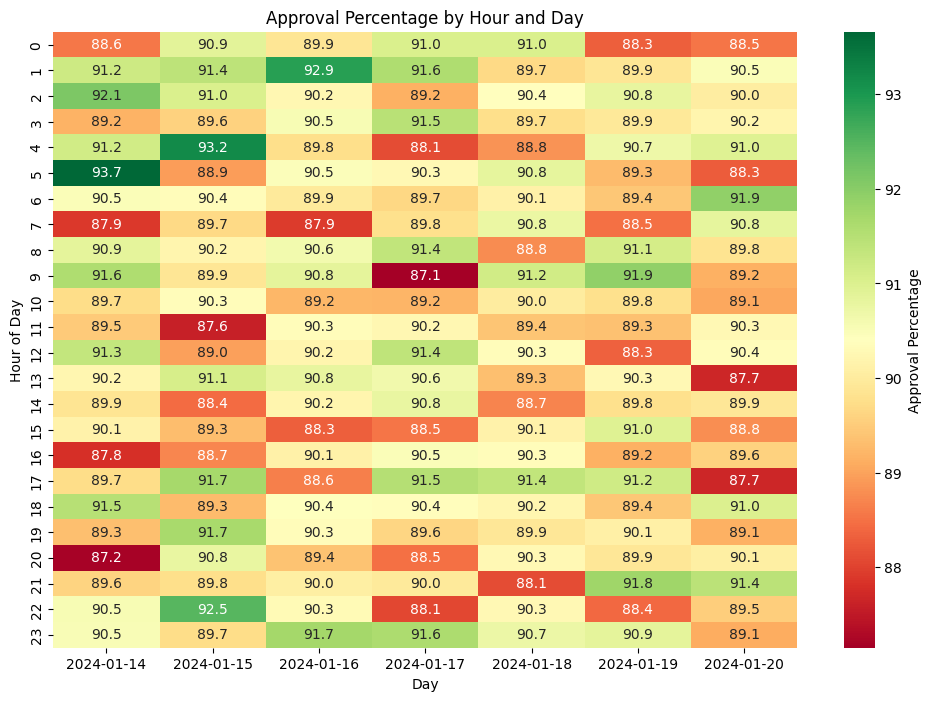

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="RdYlGn", cbar_kws={'label': 'Approval Percentage'})
plt.title('Approval Percentage by Hour and Day')
plt.xlabel('Day')
plt.ylabel('Hour of Day')
plt.show()

**SUMMARY**: There's no discernible pattern of declines by hour or day either.

## Why are all results negative?

We see that

- Fraud and non-fraud disputes are reasonably similar across regions (but fraud disputes are lower in CEMEA)
- Transaction amount does NOT impact approval.
- Jurisdiction doesn't impact approval either.
- There's no discernible pattern of declines by hour or day either.

The results are all negative because this dataset was generated randomly. Real-life datasets **never** have such uniform patterns. They show several kinds of skew.


## Lessons

- Pandas is a versatile data analysis library. Learn it well. Use it as your first choice for programmatic analysis.
- ChatGPT generates Pandas code quite well. Don't write code. Ask ChatGPT to do that and check it.